In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data

In [2]:
df = pd.read_csv('winequalityN.csv')

In [3]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Checking Null values

In [6]:
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Imputing null values with mean

In [7]:
df = df.fillna(df.mean())

C:\Users\SNEHIT REDDY\AppData\Local\Temp\ipykernel_27416\114435927.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [8]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

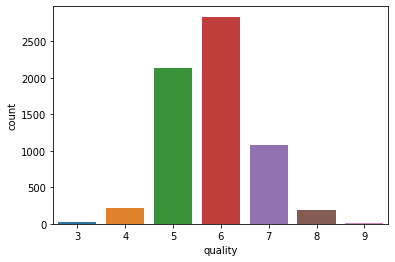

In [9]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='quality', data=df)

## Checking duplicated values

In [10]:
df.duplicated().sum()

1168

### Dropping the duplicated values

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5329, 13)

<AxesSubplot:>

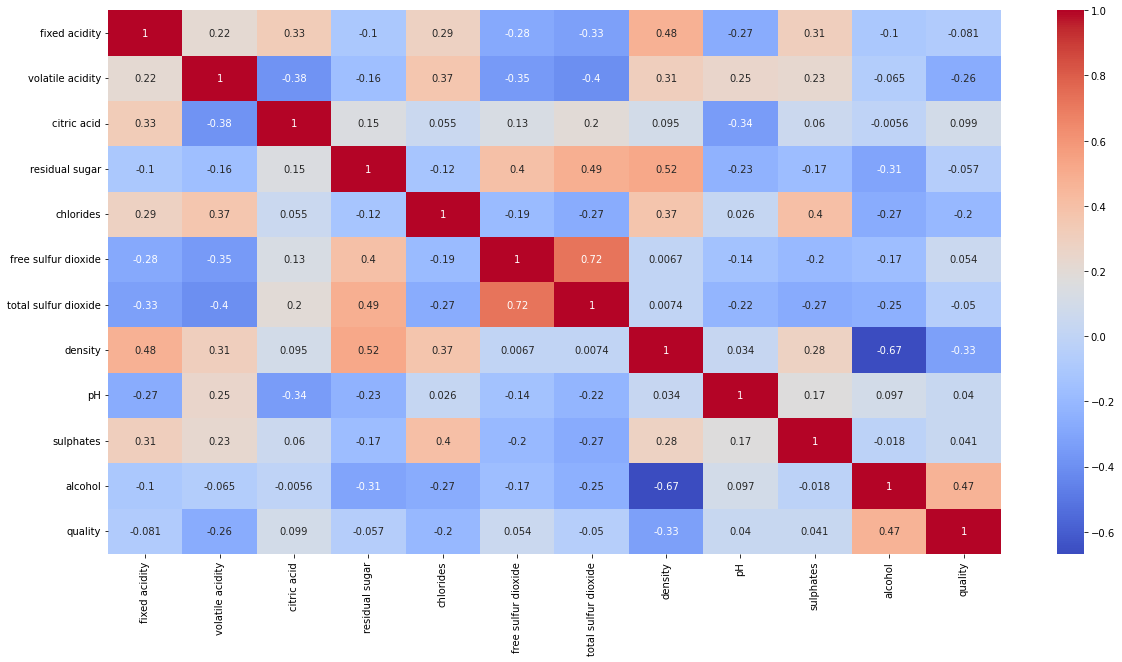

In [13]:
cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cor,annot=True,cmap='coolwarm')

In [14]:
df.duplicated().sum()

0

## Checking Outliers

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

ValueError: num must be 1 <= num <= 20, not 21

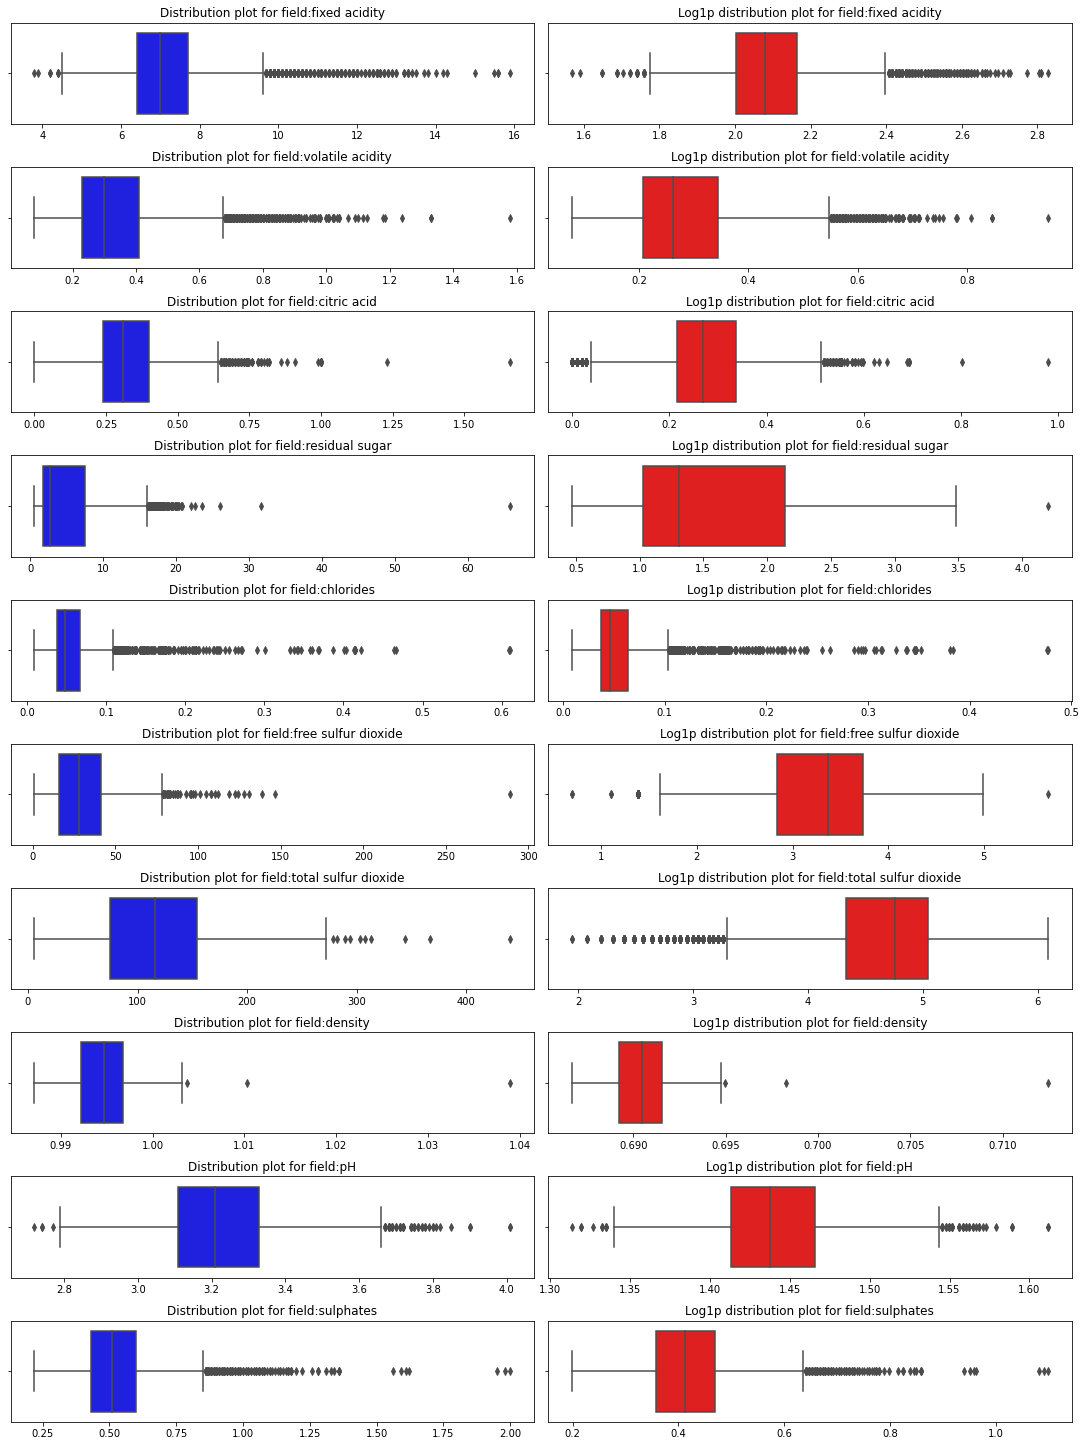

In [15]:
import warnings

# outlier check
plt.figure(figsize=(15, 20))

for i, c in enumerate(df.drop('quality', axis=1).select_dtypes(include='number').columns):
    plt.subplot(10,2,i*2+1)
    sns.boxplot(df[c], color='blue')
    plt.title('Distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

    
    plt.subplot(10,2,i*2+2)
    sns.boxplot(df[c].apply('log1p'), color='red')
    plt.title('Log1p distribution plot for field:' + c)
    plt.xlabel('')
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

In [16]:
df['type'].unique()

array(['white', 'red'], dtype=object)

## Treating cat variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df.type.head()

0    1
1    1
2    1
3    1
6    1
Name: type, dtype: int32

In [18]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


## Data splitting

In [20]:
target = 'quality'
y = df[target]
X = df.drop(target,axis=1)

In [21]:
X.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
6,1,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


# Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()
X_res = sc.fit_transform(X)

# Checking VIF Score

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_res,i) for i in range(X_res.shape[1])]
vif['Feature'] = X.columns

vif

,vif,Feature
0,6.977133,type
1,4.965312,fixed acidity
2,2.168073,volatile acidity
3,1.659646,citric acid
4,8.388986,residual sugar
5,1.653781,chlorides
6,2.249517,free sulfur dioxide
7,4.031436,total sulfur dioxide
8,20.566462,density
9,2.477729,pH


## Dropping the variables which have greater than 10 VIF

In [26]:
X_res.shape

(5329, 12)

In [27]:
X1 = X.drop(['density'],axis=1)
X1.shape

(5329, 11)

In [28]:
sc = StandardScaler()
X_rescaled = sc.fit_transform(X1)

## Data Balancing using SMOTE

In [29]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X_resampled, y_resampled = oversample.fit_resample(X_rescaled,y)

In [31]:
X_resampled.shape

(16289, 11)

In [32]:
y.value_counts()

6    2327
5    1755
7     857
4     206
8     149
3      30
9       5
Name: quality, dtype: int64

In [33]:
y_resampled.value_counts()

6    2327
5    2327
7    2327
8    2327
4    2327
3    2327
9    2327
Name: quality, dtype: int64

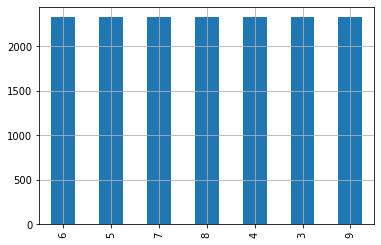

In [34]:
pd.Series(y_resampled).value_counts().plot.bar()
plt.grid()

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


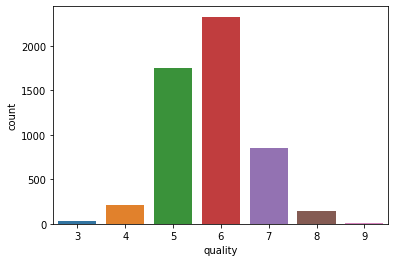

In [35]:
sns.countplot(df['quality'])
plt.show()

# Feature Selection

## Constant Features

In [37]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)

#Fitand transforming on train data
X_train1 = constant_filter.fit_transform(X_train)
print("After Droping the Constant featues, Non-Constant featues shape is:",X_train1.shape)

After Droping the Constant featues, Non-Constant featues shape is: (13031, 11)


### No constant features

## Quasi constant features

In [40]:
Qusicons_filter = VarianceThreshold(threshold=0.01)

#Fitand transforming on train data
X_train_Qusicons = Qusicons_filter.fit_transform(X_train1)
print("Non Quasi-constant train shape:",X_train_Qusicons.shape)

Non Quasi-constant train shape: (13031, 11)


### No Quasi Constant features

## Train test split

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2,random_state=10)

## Model Building

# Extra Tree

In [47]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve

In [48]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [49]:
y_train_ = etc.predict(X_train)
y_test_  = etc.predict(X_test)

In [50]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_test_,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9876    1.0000    0.9937       476
           4     0.9268    0.9764    0.9510       467
           5     0.7345    0.7233    0.7289       459
           6     0.6675    0.5560    0.6067       473
           7     0.8281    0.8896    0.8577       471
           8     0.9502    0.9953    0.9722       422
           9     1.0000    1.0000    1.0000       490

    accuracy                         0.8766      3258
   macro avg     0.8707    0.8772    0.8729      3258
weighted avg     0.8707    0.8766    0.8726      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

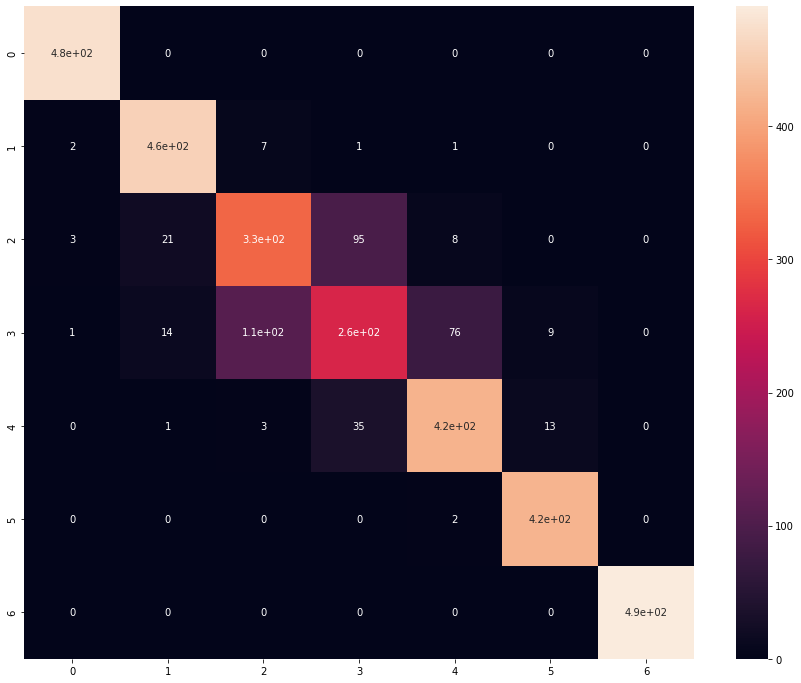

In [51]:

plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, y_test_)
sns.heatmap(cr,annot=True)


# Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier()
DTR.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
DT_train = DTR.predict(X_train)
DT_test = DTR.predict(X_test)

In [54]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, DT_test,digits=4))



Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9400    0.9538    0.9468       476
           4     0.8157    0.8437    0.8295       467
           5     0.5793    0.5730    0.5761       459
           6     0.4704    0.3700    0.4142       473
           7     0.6460    0.7282    0.6846       471
           8     0.8292    0.8744    0.8512       422
           9     0.9918    0.9918    0.9918       490

    accuracy                         0.7624      3258
   macro avg     0.7532    0.7621    0.7563      3258
weighted avg     0.7541    0.7624    0.7569      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

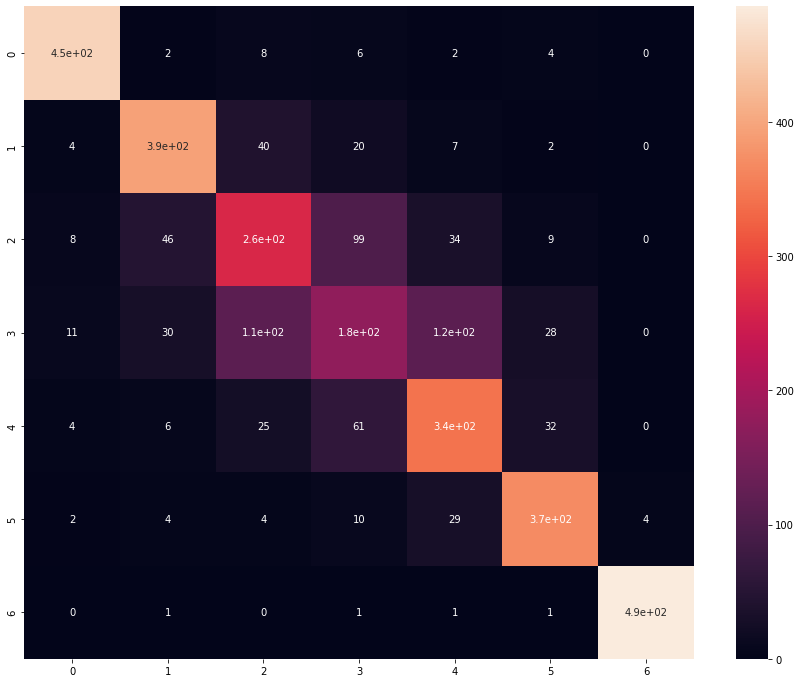

In [55]:
plt.figure(figsize=(15, 12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, DT_test)
sns.heatmap(cr,annot=True)

# Gradient Boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient boosting
GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)


GradientBoostingClassifier()

In [57]:
GB_train = GB.predict(X_train)
GB_test = GB.predict(X_test)

In [58]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, GB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9066    0.9580    0.9316       476
           4     0.7744    0.8158    0.7946       467
           5     0.5705    0.5556    0.5629       459
           6     0.5258    0.4524    0.4864       473
           7     0.6175    0.6136    0.6155       471
           8     0.7551    0.7962    0.7751       422
           9     0.9839    0.9959    0.9899       490

    accuracy                         0.7425      3258
   macro avg     0.7334    0.7411    0.7366      3258
weighted avg     0.7352    0.7425    0.7382      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

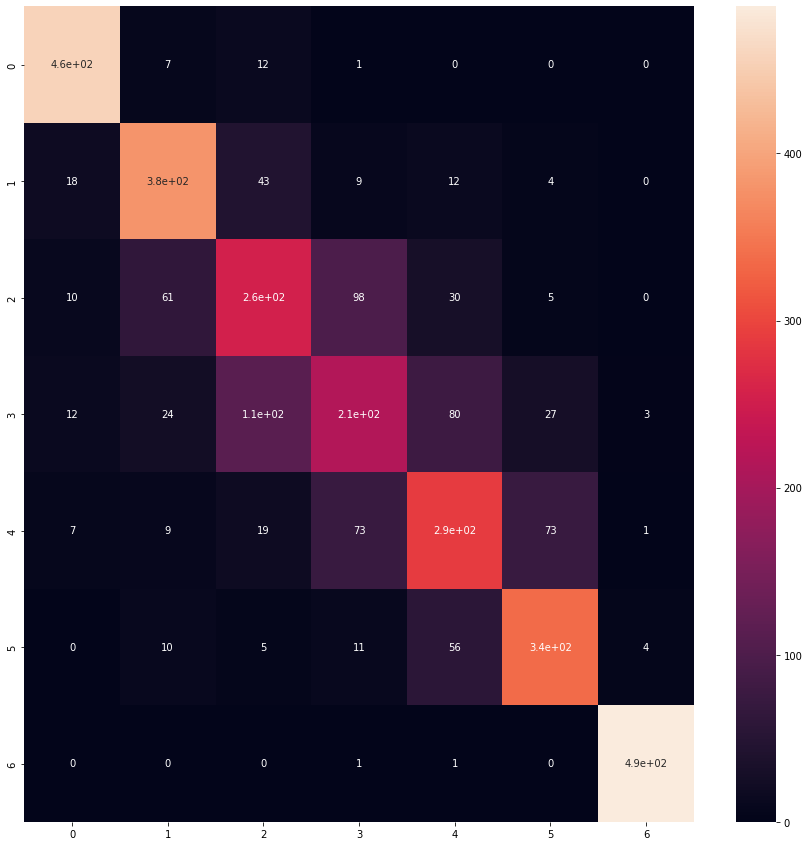

In [59]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, GB_test)
sns.heatmap(cr,annot=True)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
logre = LogisticRegression()
logre.fit(X_train, y_train)

C:\Users\SNEHIT REDDY\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
LR_train = logre.predict(X_train)
LR_test  = logre.predict(X_test)


In [62]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, LR_test,digits=4))


Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.4509    0.4538    0.4524       476
           4     0.4712    0.4732    0.4722       467
           5     0.4451    0.4597    0.4523       459
           6     0.3405    0.2664    0.2989       473
           7     0.3879    0.3121    0.3459       471
           8     0.4597    0.5806    0.5131       422
           9     0.8845    1.0000    0.9387       490

    accuracy                         0.5083      3258
   macro avg     0.4914    0.5065    0.4962      3258
weighted avg     0.4942    0.5083    0.4985      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

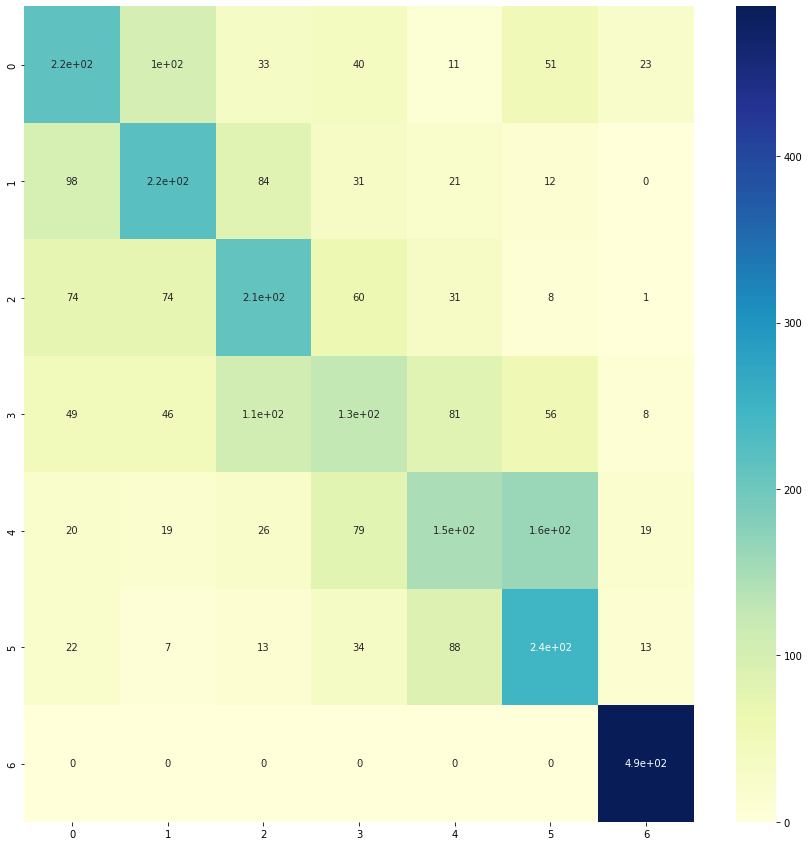

In [63]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, LR_test)
sns.heatmap(cr,annot=True,cmap='YlGnBu')

# SVC

In [64]:
from sklearn.svm import SVC
# Support Vector Machines
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [65]:
SVC_train = svm.predict(X_train)
SVC_test  = svm.predict(X_test)

In [66]:
print(svm)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_test, SVC_test,digits=4))

SVC()
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9279    0.9727    0.9497       476
           4     0.7175    0.8158    0.7635       467
           5     0.5432    0.5338    0.5385       459
           6     0.4360    0.3171    0.3672       473
           7     0.5517    0.5096    0.5298       471
           8     0.6482    0.7773    0.7069       422
           9     0.9959    1.0000    0.9980       490

    accuracy                         0.7050      3258
   macro avg     0.6886    0.7037    0.6934      3258
weighted avg     0.6918    0.7050    0.6956      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

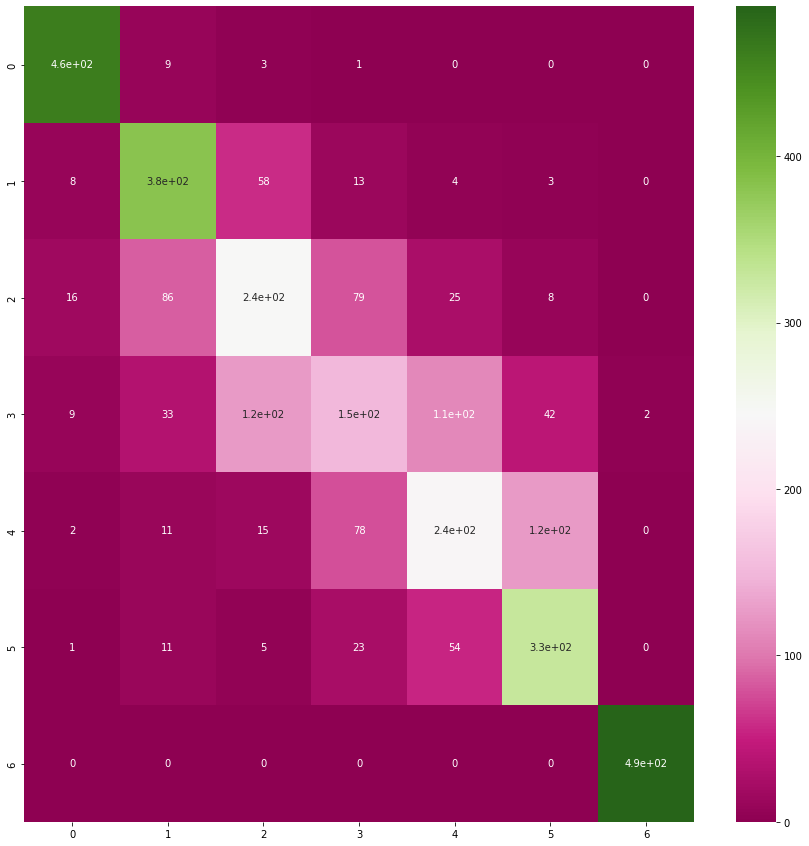

In [67]:
plt.figure(figsize=(15,15))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, SVC_test)
sns.heatmap(cr,annot=True,cmap = "PiYG")

# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1,random_state=123)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_jobs=-1, random_state=123)

In [69]:
RFC_train = rfc.predict(X_train)
RFC_test = rfc.predict(X_test)

In [70]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, RFC_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.9876    1.0000    0.9937       476
           4     0.9111    0.9657    0.9376       467
           5     0.7194    0.7037    0.7115       459
           6     0.6400    0.5074    0.5660       473
           7     0.8113    0.8854    0.8467       471
           8     0.9181    0.9834    0.9497       422
           9     0.9959    0.9980    0.9969       490

    accuracy                         0.8628      3258
   macro avg     0.8548    0.8634    0.8575      3258
weighted avg     0.8551    0.8628    0.8573      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

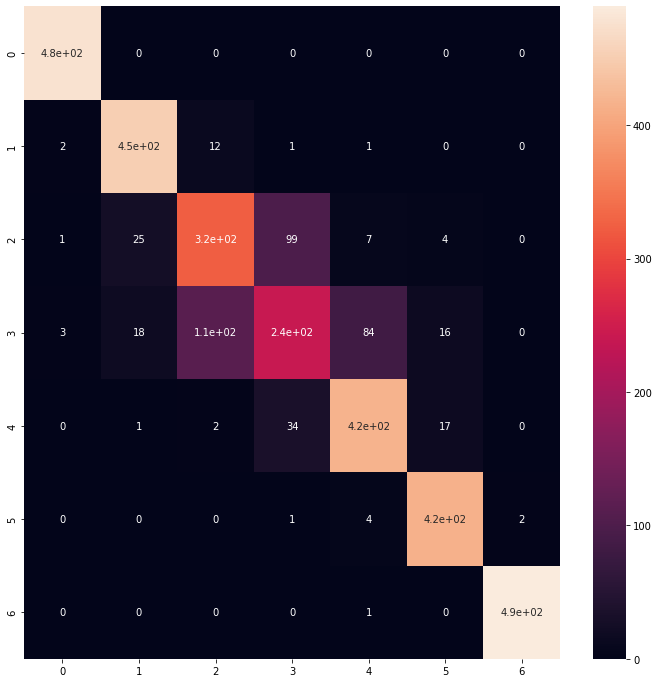

In [71]:
plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, RFC_test)
sns.heatmap(cr,annot=True)

# Naive Bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB()

In [73]:
NB_test = NB.predict(X_test)

In [74]:
print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, NB_test,digits=4))

Test performance
-------------------------------------------------------
              precision    recall  f1-score   support

           3     0.6536    0.3845    0.4841       476
           4     0.4106    0.3490    0.3773       467
           5     0.4110    0.2767    0.3307       459
           6     0.2464    0.2199    0.2324       473
           7     0.2593    0.1189    0.1630       471
           8     0.2294    0.2180    0.2236       422
           9     0.3974    1.0000    0.5688       490

    accuracy                         0.3729      3258
   macro avg     0.3725    0.3667    0.3400      3258
weighted avg     0.3750    0.3729    0.3432      3258



Confusion matrix
-------------------------------------------------------


<AxesSubplot:>

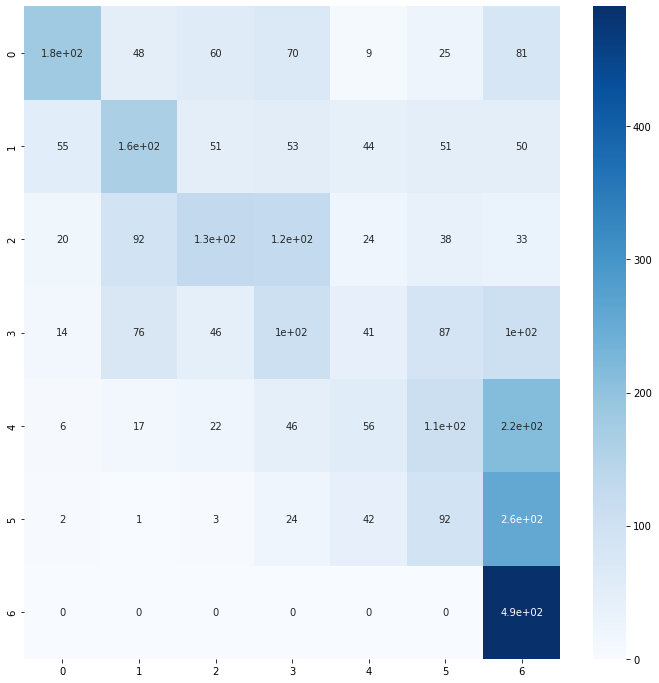

In [75]:
plt.figure(figsize=(12,12))
print('Confusion matrix')
print('-------------------------------------------------------')
cr = confusion_matrix(y_test, NB_test)
sns.heatmap(cr,annot=True,cmap='Blues')

# Stacking

In [76]:
estimators = [
    ('RFC', RandomForestClassifier(n_estimators=110, random_state=42)),
    ('ETC', ExtraTreesClassifier(n_estimators=110)),
    ('DTC',DecisionTreeClassifier())
]

In [77]:
from sklearn.ensemble import StackingClassifier

clf = StackingClassifier(
    estimators=estimators, 
    final_estimator=GradientBoostingClassifier(),
    cv=10
)

In [78]:
clf.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('RFC',
                                RandomForestClassifier(n_estimators=110,
                                                       random_state=42)),
                               ('ETC', ExtraTreesClassifier(n_estimators=110)),
                               ('DTC', DecisionTreeClassifier())],
                   final_estimator=GradientBoostingClassifier())

In [79]:
y_pred = clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.879987722529159